# back-propagation
- $\nabla_{\theta}J(\theta)$
\begin{align}
\frac{\partial z}{\partial x_i}&=\sum_{j}\frac{\partial z}{\partial y_j}\frac{\partial y_j}{\partial x_i} \\
\nabla_{\textbf{\textit{x}}}z &= \left( \frac{\partial \textbf{\textit{y}}}{\partial \textbf{\textit{x}}} \right)^T \nabla_{\textbf{\textit{y}}}z
\end{align}

In [1]:
import torch

In [6]:
x = torch.tensor([1.0], requires_grad=True)
y = 3*x**2 + 2*x
g = 2*y
g.backward()
print(x.grad.data.item())

16.0


# hidden units

In [12]:
import torch
from torch import nn

import matplotlib.pyplot as plt

In [9]:
layer = nn.ReLU()
x = torch.randn(3, requires_grad=True)
print(x)
y = layer(x)
print(y)

tensor([-0.0344,  0.3709,  1.2956], requires_grad=True)
tensor([0.0000, 0.3709, 1.2956], grad_fn=<ReluBackward0>)


In [10]:
layer = nn.PReLU()
y = layer(x)
print(y)

tensor([-0.0086,  0.3709,  1.2956], grad_fn=<PreluBackward0>)


- $tanh(z)=2\sigma(2z)-1$

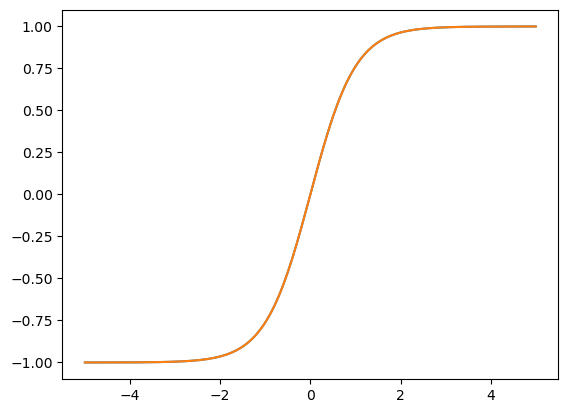

In [15]:
x = torch.linspace(-5, 5, 201)
y1 = nn.Sigmoid()(x * 2) * 2 - 1
y2 = nn.Tanh()(x)
plt.plot(x, y1)
plt.plot(x, y2)

tensor([0.1942, 0.6709], grad_fn=<PreluBackward0>)


In [1]:
import torch as T

class Maxout(T.nn.Module):
    """Class Maxout implements maxout unit introduced in paper by Goodfellow et al, 2013.
    
    :param in_feature: Size of each input sample.
    :param out_feature: Size of each output sample.
    :param n_channels: The number of linear pieces used to make each maxout unit.
    :param bias: If set to False, the layer will not learn an additive bias.
    """
    
    def __init__(self, in_features, out_features, n_channels, bias=True):
        super().__init__()
        
        self.in_features = in_features
        self.out_features = out_features
        self.n_channels = n_channels
        self.weight = T.nn.Parameter(T.Tensor(n_channels * out_features, in_features))
        
        if bias:
            self.bias = T.nn.Parameter(T.Tensor(n_channels * out_features))
        else:
            self.register_parameter('bias', None)
            
        self.reset_parameters()
    
    def forward(self, input):
        a = T.nn.functional.linear(input, self.weight, self.bias)
        b = T.nn.functional.max_pool1d(a.unsqueeze(-3), kernel_size=self.n_channels)
        return b.squeeze()
    
    def reset_parameters(self):
        irange = 0.005
        T.nn.init.uniform_(self.weight, -irange, irange)
        if self.bias is not None:
            T.nn.init.uniform_(self.bias, -irange, irange)
    
    def extra_repr(self):
        return (f'in_features={self.in_features}, '
                f'out_features={self.out_features}, '
                f'n_channels={self.n_channels}, '
                f'bias={self.bias is not None}')

In [5]:
layer = Maxout(2, 3, 1)
x = T.tensor([
  [1,2],
  [4,5],
  [9,8],
], dtype=T.float)
print(layer(x))

tensor([[ 0.0037,  0.0089, -0.0006],
        [ 0.0075,  0.0221, -0.0072],
        [ 0.0082,  0.0447, -0.0213]], grad_fn=<SqueezeBackward0>)


# probability

In [1]:
import torch

In [17]:
mu, sigma = 0.0, 1.0
model = torch.distributions.Normal(mu, sigma)
sample = model.sample([1000])
print(sample.mean().item())

0.04363635182380676


In [18]:
mu = torch.rand(1, requires_grad=True)
lr = 0.00001
for _ in range(10000):
  tmp_model = torch.distributions.Normal(mu, sigma)
  NLL = -tmp_model.log_prob(sample).sum()
  NLL.backward()

  if mu.grad.data.item() < 1e-3:
    print(f'nll: {NLL.item()}, mu: {mu.item()}, grad: {mu.grad.data.item()}')
    break

  mu.data -= lr * mu.grad.data
  mu.grad.data.zero_()

nll: 1467.860107421875, mu: 0.043637342751026154, grad: 0.0009937286376953125


In [19]:
mu = torch.autograd.Variable(sample.mean(), requires_grad=True)
tmp_model = torch.distributions.Normal(mu, sigma)
NLL = -tmp_model.log_prob(sample).sum()
NLL.backward()

print(mu.grad.data.item())

-1.1444091796875e-05
